<a href="https://colab.research.google.com/github/1234GoodDawg/CZ4052_Project/blob/main/CZ4052_assigment_1_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
np.random.seed(42)

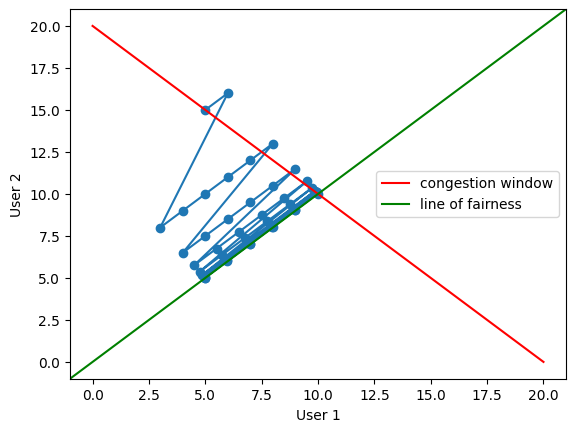

In [2]:
iterations = 50
cwnd_max = 20

alpha1 = alpha2 = 1
beta1 = beta2 = 0.5

user1 = [5]
user2 = [15]

count = 0

for x in range(iterations):

    x1 = user1[-1]
    x2 = user2[-1]

    if x1 + x2 <= cwnd_max:

        x1 += alpha1
        x2 += alpha2

    else:
        x1 *= beta1
        x2 *= beta2

    count = count + 1

    user1.append(x1)


    user2.append(x2)

plt.plot(user1, user2, marker='o')

plt.plot(np.arange(0, cwnd_max+1), cwnd_max - np.arange(0, cwnd_max+1), color='red', label = 'congestion window')

plt.axline((0, 0), slope=1, color='green', label = 'line of fairness')
plt.xlabel('User 1')
plt.ylabel('User 2')

plt.legend()
plt.show()

In [3]:
def AIMD_base(cwnd, cwnd_sum, cwnd_max, user_idx, alpha, beta, loss_occurs = True):

    cwnd = cwnd + alpha(user_idx, cwnd)

    if loss_occurs:

      cwnd = math.floor(cwnd * beta(cwnd))

    return cwnd

In [4]:
def plot_AIMD(track_cwnd_size, users):


  plt.figure(figsize=(10,8))

  for user in range(users):

      plt.plot(track_cwnd_size[user], label=f'User {user + 1}')


  plt.xlabel('iterations')
  plt.ylabel('cwnd')

  iter_ticks = list(range(len(track_cwnd_size[0])))
  plt.xticks(iter_ticks, iter_ticks, rotation=45, ha='right')

  plt.show()

In [5]:
def AIMD_run(iterations, users, cwnd_starting, cwnd_max, alpha, beta):

  cwnd_sum = 0

  track_cwnd_size = np.zeros((users, iterations))


  for user, initial_cwnd in enumerate(cwnd_starting):

    track_cwnd_size[user, 0] = initial_cwnd

  for iteration in range(iterations):
    current_total_cwnd = 0

    if cwnd_sum > cwnd_max:

      loss_occurs = True

    else:

      loss_occurs = False

    for user in range(users):

      if iteration == 0:
        cwnd = track_cwnd_size[user, 0]

      else:
        cwnd = track_cwnd_size[user, iteration-1]

      cwnd = AIMD_base(cwnd, cwnd_sum, cwnd_max, user, alpha, beta, loss_occurs)

      track_cwnd_size[user, iteration] = cwnd
      current_total_cwnd += cwnd

    cwnd_sum = current_total_cwnd


  plot_AIMD(track_cwnd_size, users)

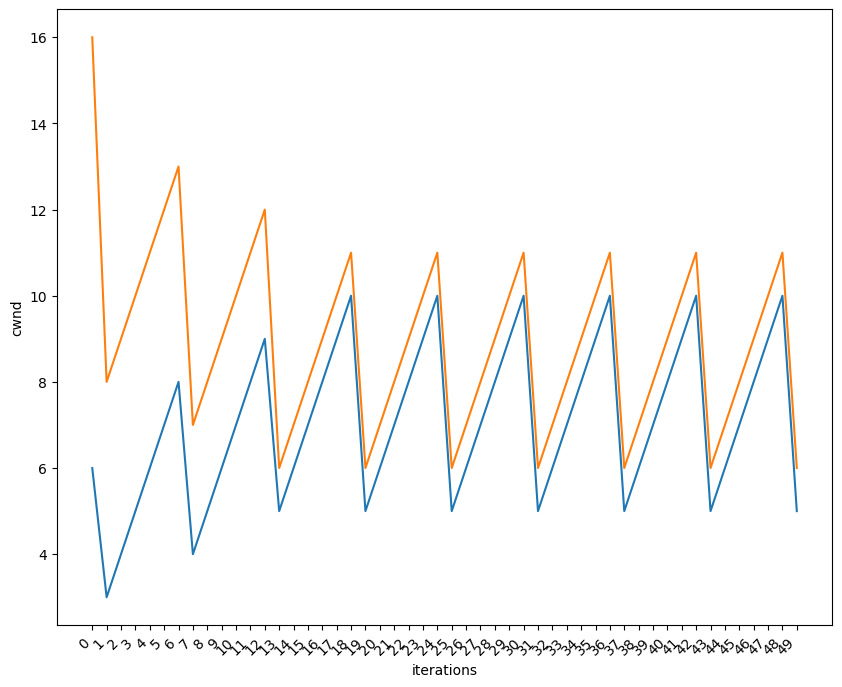

In [6]:
iterations = 50
users = 2
cwnd_starting = [5,15]
cwnd_max = 20

def alpha(user, cwnd):
    return 1


def beta(cwnd):
    return 0.5

AIMD_run(iterations, users, cwnd_starting, cwnd_max, alpha, beta)

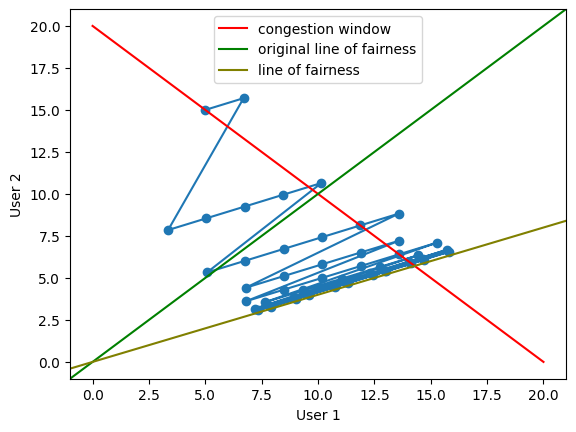

In [7]:
iterations = 50
cwnd_max = 20

alpha1 = 1.7
alpha2 = 0.7

beta1 = beta2 = 0.5

user1 = [5]
user2 = [15]

count = 0

for x in range(iterations):

    x1 = user1[-1]
    x2 = user2[-1]

    if x1 + x2 <= cwnd_max:

        x1 += alpha1
        x2 += alpha2

    else:
        x1 *= beta1
        x2 *= beta2

    count = count + 1

    user1.append(x1)


    user2.append(x2)

plt.plot(user1, user2, marker='o')

plt.plot(np.arange(0, cwnd_max+1), cwnd_max - np.arange(0, cwnd_max+1), color='red', label = 'congestion window')

plt.axline((0, 0), slope=1, color='green', label = 'original line of fairness')
plt.axline((0, 0), slope=0.4, color='olive', label = 'line of fairness')
plt.xlabel('User 1')
plt.ylabel('User 2')

plt.legend()
plt.show()

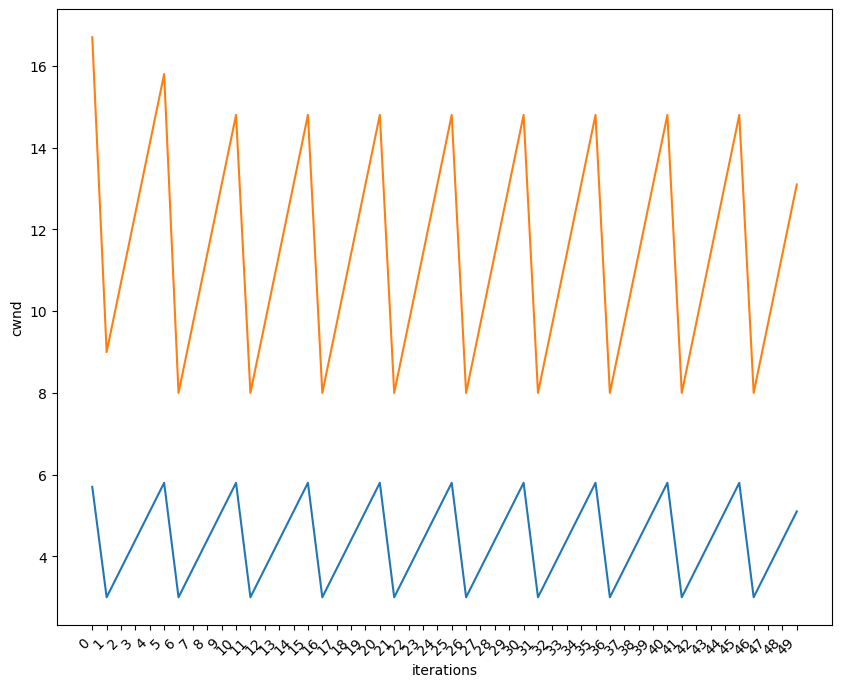

In [8]:
iterations = 50
users = 2
cwnd_starting = [5,15]
cwnd_max = 20

def alpha(user, cwnd):
    return user + 0.7

def beta(cwnd):
    return 0.5

AIMD_run(iterations, users, cwnd_starting, cwnd_max, alpha, beta)

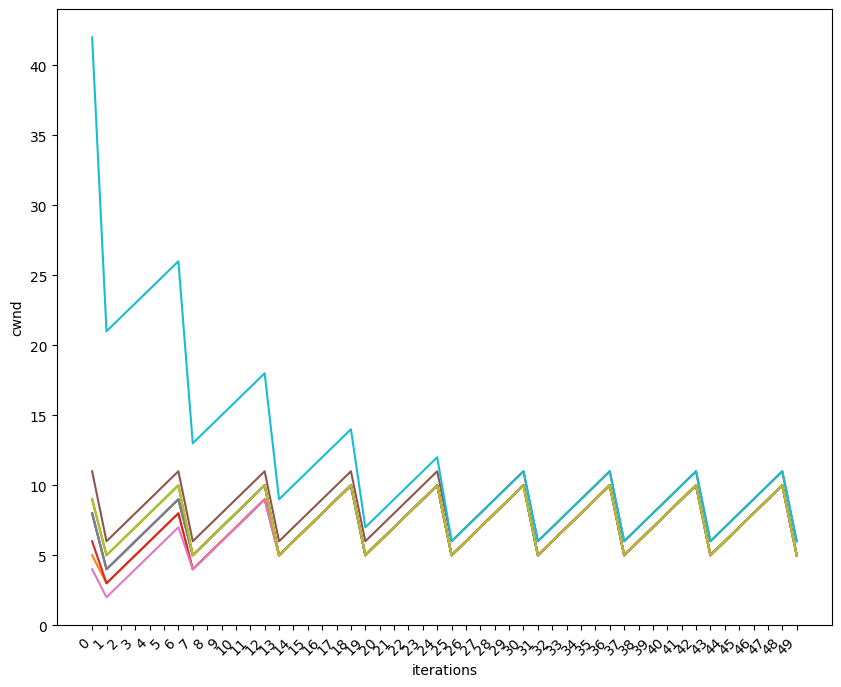

In [9]:
iterations = 50
users = 10
cwnd_max = 100

random_values = np.random.randint(1, 11, 9)
last_value = cwnd_max - np.sum(random_values)

cwnd_starting = np.append(random_values, last_value)

def alpha(user, cwnd):
    return 1

def beta(cwnd):
    return 0.5


AIMD_run(iterations, users, cwnd_starting, cwnd_max, alpha, beta)

Logarithmic Alpha

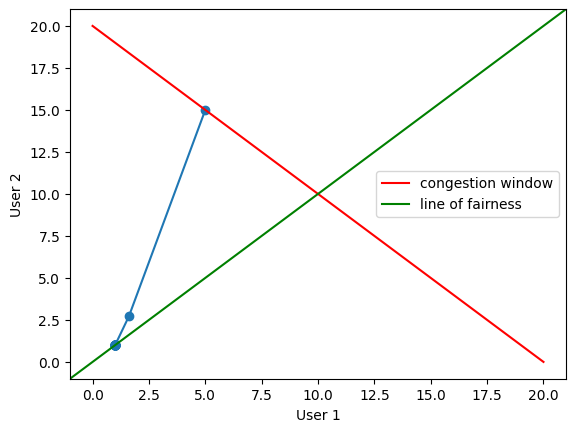

In [10]:
iterations = 50
cwnd_max = 20

alpha1 = alpha2 = 1
beta1 = beta2 = 1/2

user1 = [5]
user2 = [15]

count = 0

for x in range(iterations):

    cwnd1 = user1[-1]
    cwnd2 = user2[-1]

    if cwnd1 + cwnd2 <= cwnd_max:

        cwnd1 = max(1, math.log(max(1, cwnd1)))
        cwnd2 = max(1, math.log(max(1, cwnd2)))

    else:
        cwnd1 *= beta1
        cwnd2 *= beta2

    count = count + 1

    user1.append(cwnd1)


    user2.append(cwnd2)

plt.plot(user1, user2, marker='o')

plt.plot(np.arange(0, cwnd_max+1), cwnd_max - np.arange(0, cwnd_max+1), color='red', label = 'congestion window')

plt.axline((0, 0), slope=1, color='green', label = 'line of fairness')
plt.xlabel('User 1')
plt.ylabel('User 2')

plt.legend()
plt.show()

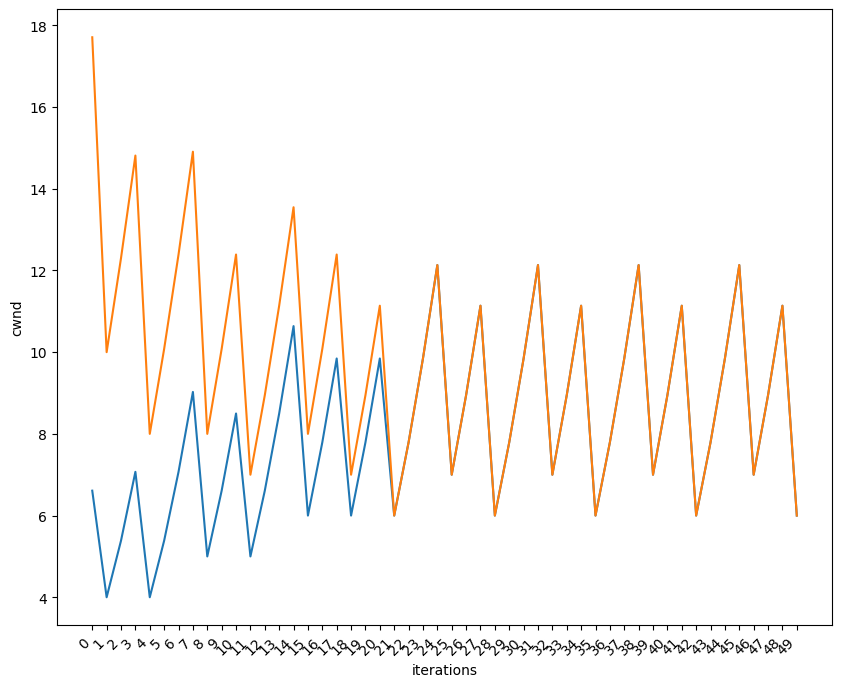

In [11]:
iterations = 50
users = 2
cwnd_starting = [5,15]
cwnd_max = 20

def alpha(user, cwnd):

    return max(1, math.log(max(1, cwnd)))

def beta(cwnd):
    return 0.5

AIMD_run(iterations, users, cwnd_starting, cwnd_max, alpha, beta)

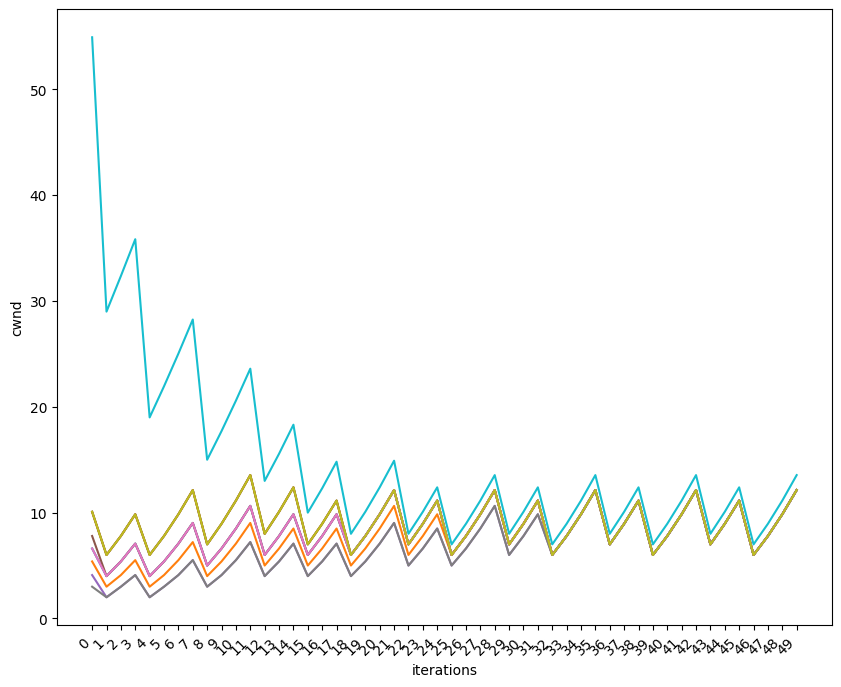

In [12]:
iterations = 50
users = 10
cwnd_max = 100

random_values = np.random.randint(1, 11, 9)
last_value = cwnd_max - np.sum(random_values)

cwnd_starting = np.append(random_values, last_value)

def alpha(user, cwnd):

    return max(1, math.log(max(1, cwnd)))

def beta(cwnd):
    return 0.5

AIMD_run(iterations, users, cwnd_starting, cwnd_max, alpha, beta)

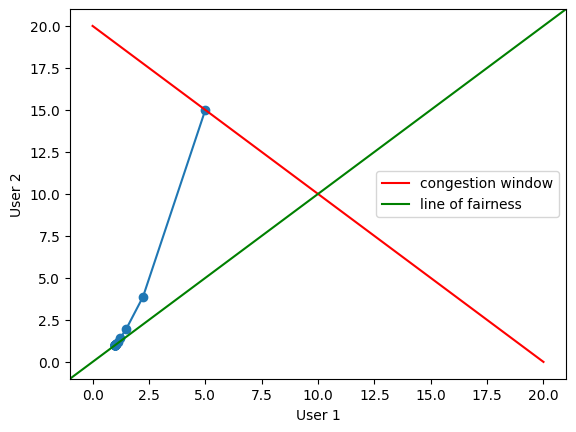

In [14]:
iterations = 50
cwnd_max = 20

alpha1 = alpha2 = 1
beta1 = beta2 = 1/2

user1 = [5]
user2 = [15]

count = 0

for x in range(iterations):

    exponent = 0.5

    cwnd1 = user1[-1]
    cwnd2 = user2[-1]

    if cwnd1 + cwnd2 <= cwnd_max:

        cwnd1 = max(1, cwnd1 ** exponent)
        cwnd2 = max(1, cwnd2 ** exponent)


    else:
        cwnd1 *= beta1
        cwnd2 *= beta2

    count = count + 1

    user1.append(cwnd1)


    user2.append(cwnd2)

plt.plot(user1, user2, marker='o')

plt.plot(np.arange(0, cwnd_max+1), cwnd_max - np.arange(0, cwnd_max+1), color='red', label = 'congestion window')

plt.axline((0, 0), slope=1, color='green', label = 'line of fairness')
plt.xlabel('User 1')
plt.ylabel('User 2')

plt.legend()
plt.show()

Exponential Alpha

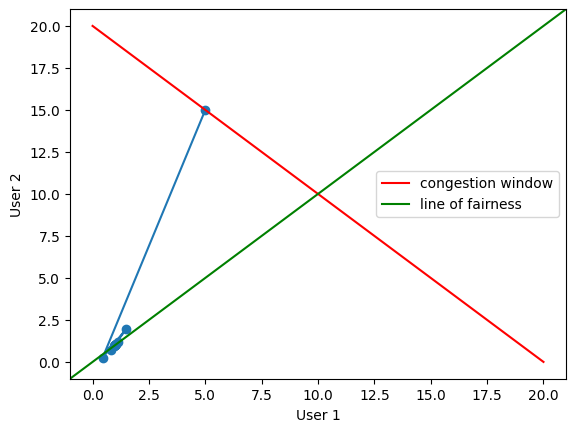

In [15]:
iterations = 50
cwnd_max = 20

alpha1 = alpha2 = 1
beta1 = beta2 = 1/2

user1 = [5]
user2 = [15]

count = 0

for x in range(iterations):

    exponent = -0.5

    cwnd1 = user1[-1]
    cwnd2 = user2[-1]

    if cwnd1 + cwnd2 <= cwnd_max:

        cwnd1 = cwnd1 ** exponent
        cwnd2 = cwnd2 ** exponent

    else:
        cwnd1 *= beta1
        cwnd2 *= beta2

    count = count + 1

    user1.append(cwnd1)


    user2.append(cwnd2)

plt.plot(user1, user2, marker='o')

plt.plot(np.arange(0, cwnd_max+1), cwnd_max - np.arange(0, cwnd_max+1), color='red', label = 'congestion window')

plt.axline((0, 0), slope=1, color='green', label = 'line of fairness')
plt.xlabel('User 1')
plt.ylabel('User 2')

plt.legend()
plt.show()

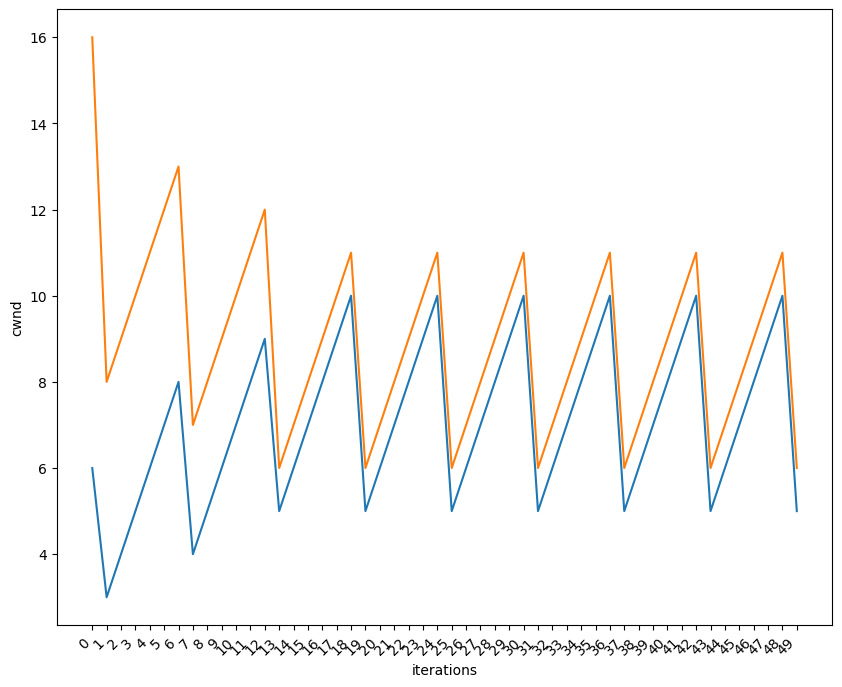

In [16]:
iterations = 50
users = 2
cwnd_starting = [5,15]
cwnd_max = 20

def alpha(user, cwnd):
    exponent = -0.5
    return max(1, cwnd ** exponent)

def beta(cwnd):
    return 0.5

AIMD_run(iterations, users, cwnd_starting, cwnd_max, alpha, beta)

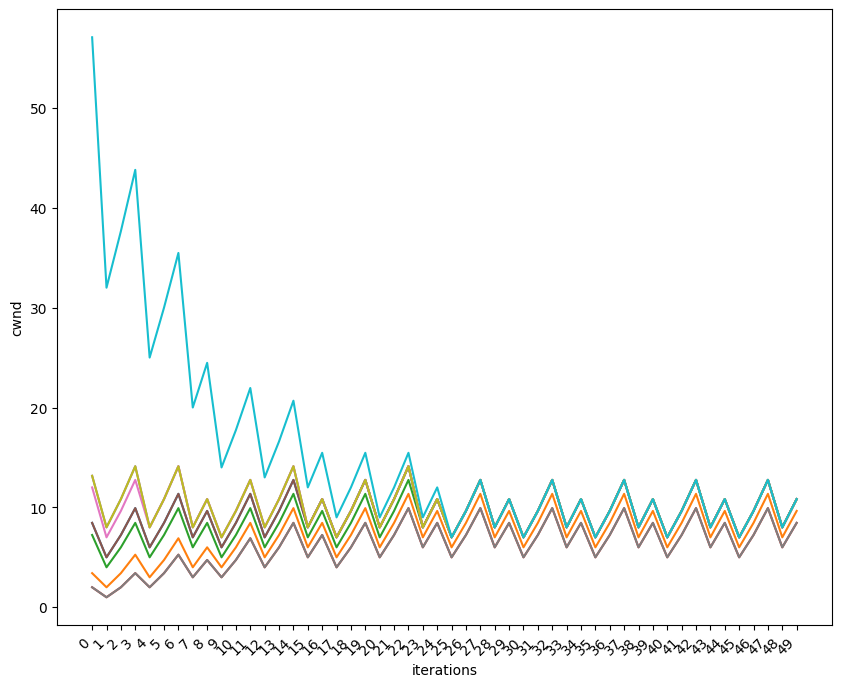

In [17]:
iterations = 50
users = 10
cwnd_max = 100

random_values = np.random.randint(1, 11, 9)
last_value = cwnd_max - np.sum(random_values)

cwnd_starting = np.append(random_values, last_value)

def alpha(user, cwnd):
    exponent = 0.5
    return max(1, cwnd ** exponent)

def beta(cwnd):
    return 0.5
AIMD_run(iterations, users, cwnd_starting, cwnd_max, alpha, beta)